**Image Processing**

In this project, I took an image and did initial image processing. Then I used kmeans to look at the color breakdown of an image, blur the image, increase contrast, increase brightness, and convert to greyscale.

In [1]:
pip install opencv-python scikit-learn numpy matplotlib

In [ ]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import files
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/Imagedata')

Drive already mounted at /content/Imagedata; to attempt to forcibly remount, call drive.mount("/content/Imagedata", force_remount=True).


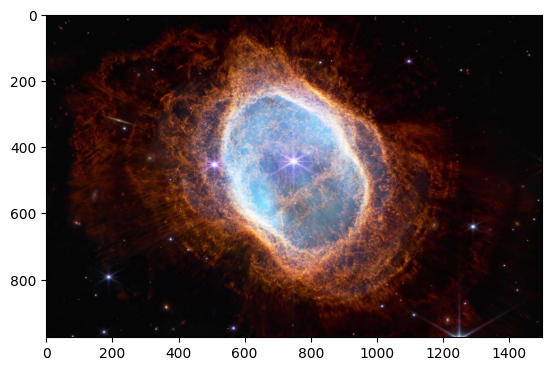

In [ ]:
image= cv2.imread('/content/Imagedata/MyDrive/james-webb-hole-WEBB0722-a7b14258290d4da9be4c7d50ee732d9b.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
#converting an RGB color into Hex color format
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [ ]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [ ]:
def color_analysis(img):
    clf = KMeans(n_clusters = 6)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['#0a0505', '#73361f', '#d8d8e2', '#4a180c', '#cca090', '#6a4952', '#ab6751', '#7e819d', '#9cb3d8', '#260706']


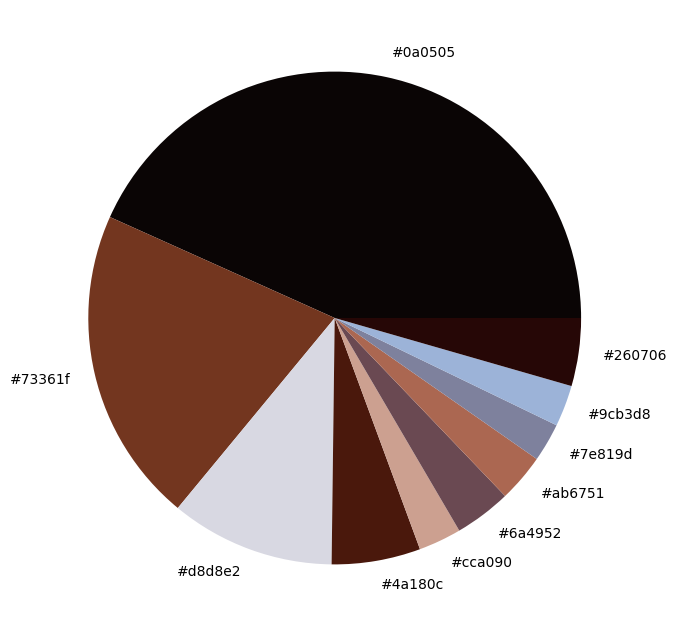

In [ ]:
modified_image = prep_image(image)
clf = KMeans(n_clusters = 10)
color_labels = clf.fit_predict(modified_image)
center_colors = clf.cluster_centers_
counts = Counter(color_labels)
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
plt.figure(figsize = (12, 8))
plt.pie(counts.values(),colors = hex_colors,labels=hex_colors)
plt.savefig("color_analysis_report.png")
print(hex_colors)

In [ ]:
blurred_image = cv2.GaussianBlur(image,(45,45),0)

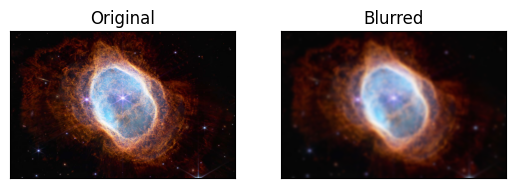

In [ ]:
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred_image),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#increasing contrast
increased_contrast = cv2.convertScaleAbs(image, alpha=1.5, beta=0)

# Increase brightness
increased_brightness = cv2.convertScaleAbs(image, alpha=1, beta=50)

In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

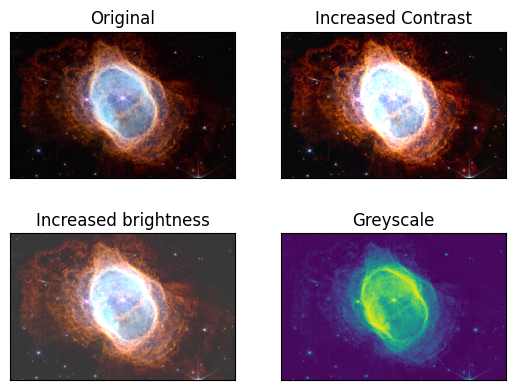

In [ ]:

plt.subplot(2, 2, 1),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2),plt.imshow(increased_contrast),plt.title('Increased Contrast')
plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3),plt.imshow(increased_brightness),plt.title('Increased brightness')
plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4),plt.imshow(gray_image),plt.title('Greyscale')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
greyscale_image= cv2.imread('/content/Imagedata/MyDrive/STScI-01EVVJAER7JGJV22QEYTX3GFDC.jpeg')
